<center>
<h1>Lets Grow More</h1>
<h2>Muhammad Ahmed Raza<br> Data Science Intern</h2>
<h3>Intermediate Level Task 3</h3>
</center>

## Prediction using Decision Tree Algorithm
#### Project Description
The Iris flower dataset is a well-known dataset in the machine learning community. It contains measurements of different parts of iris flowers from three different species. The goal of this project is to classify the species of iris flowers based on their measurements using a Decision Tree algorithm. <br>
## __Dataset:__
- __Source:__ The dataset is sourced from the UCI Machine Learning Repository.
- __Features:__
    - __SepalLengthCm:__ Sepal length in cm
    - __SepalWidthCm:__ Sepal width in cm
    - __PetalLengthCm:__ Petal length in cm
    - __PetalWidthCm:__ Petal width in cm
- __Target:__
    - __Species:__ The species of the iris flower (Setosa, Versicolor, Virginica)

#### Results and Observations
- The trained Decision Tree Classifier can predict the species of iris flowers based on sepal and petal measurements.
- The visualization of the decision tree provides insights into how the model makes decisions based on different feature values.
- Limiting the depth of the tree to 3 helps in understanding the major decision points without making the tree too complex.



## Python Code Implementation
### Import Libraries and Load Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [6]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Load the dataset

In [8]:
data=pd.read_csv("Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Dataset Shape

In [10]:
data.shape

(150, 6)

# Dataset Columns

In [12]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Dataset Summary

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Dataset Statistical Summary

In [16]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Checking Null Values

In [18]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Checking columns count of "Species"

In [21]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Data Visualization

### Plotting the Pairplot

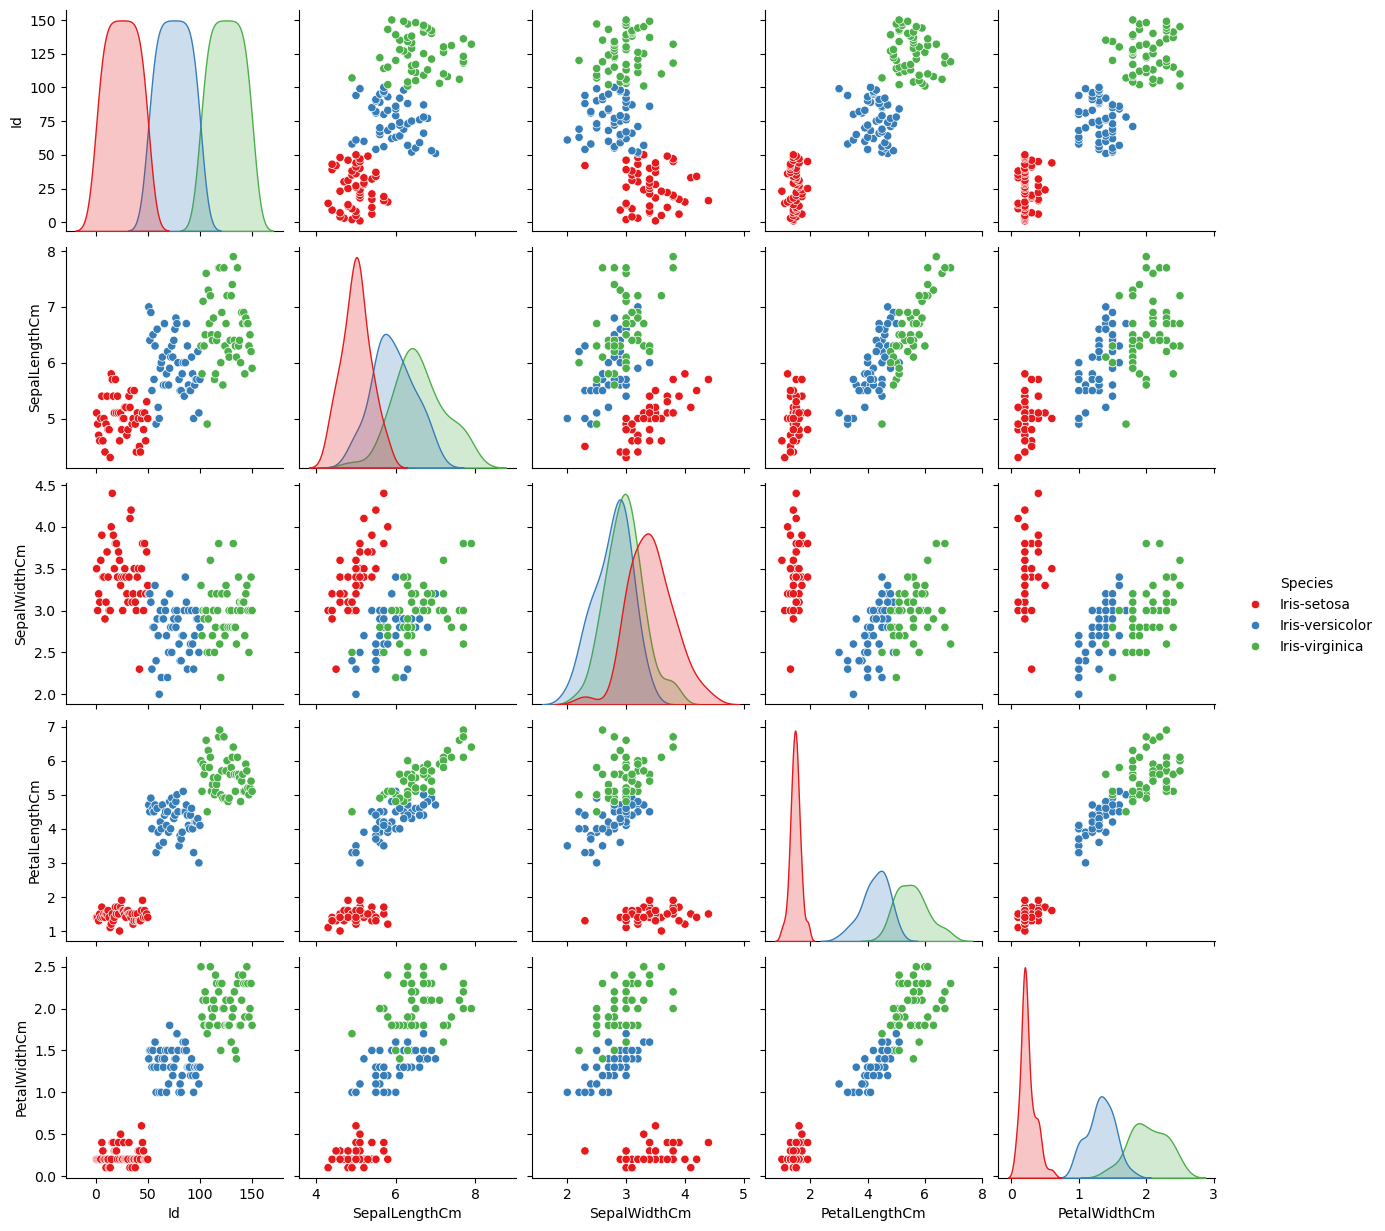

In [24]:
sns.pairplot(data,hue='Species', palette = 'Set1')

### Plotting the Boxplot

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

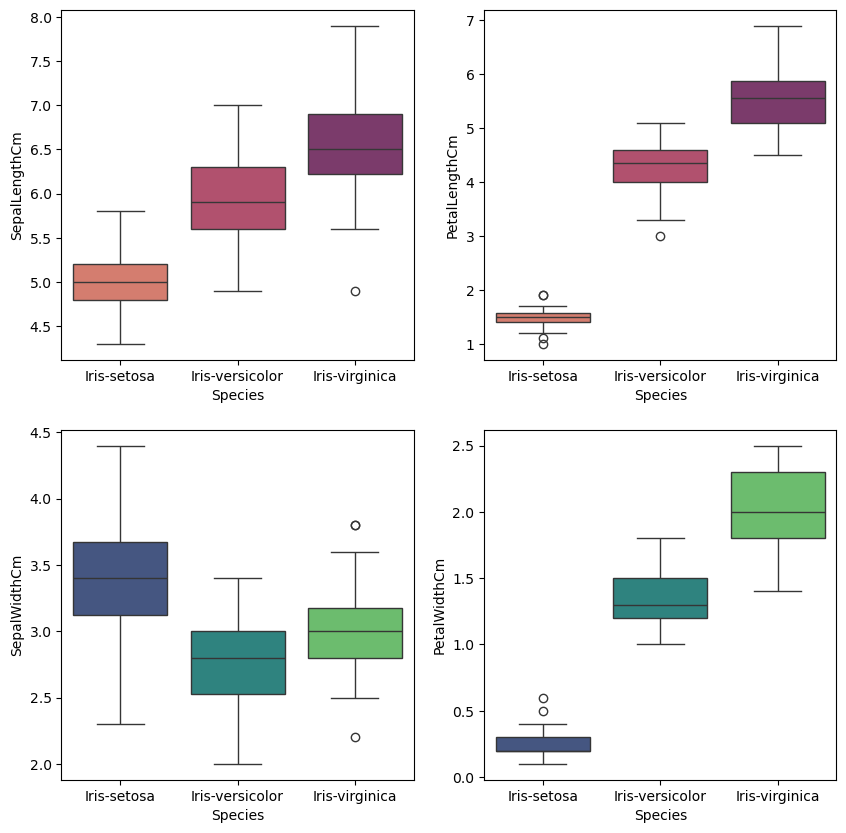

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(y = 'SepalLengthCm', x = 'Species', data = data, palette = 'flare')

plt.subplot(2,2,2)
# Checking for the outliers
sns.boxplot(y = 'PetalLengthCm', x = 'Species', data = data, palette = 'flare')

plt.subplot(2,2,3)
sns.boxplot(y = 'SepalWidthCm', x = 'Species', data = data, palette = 'viridis')


plt.subplot(2,2,4)
sns.boxplot(y = 'PetalWidthCm', x = 'Species', data = data, palette = 'viridis')

### Plotting the Scatterplot

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

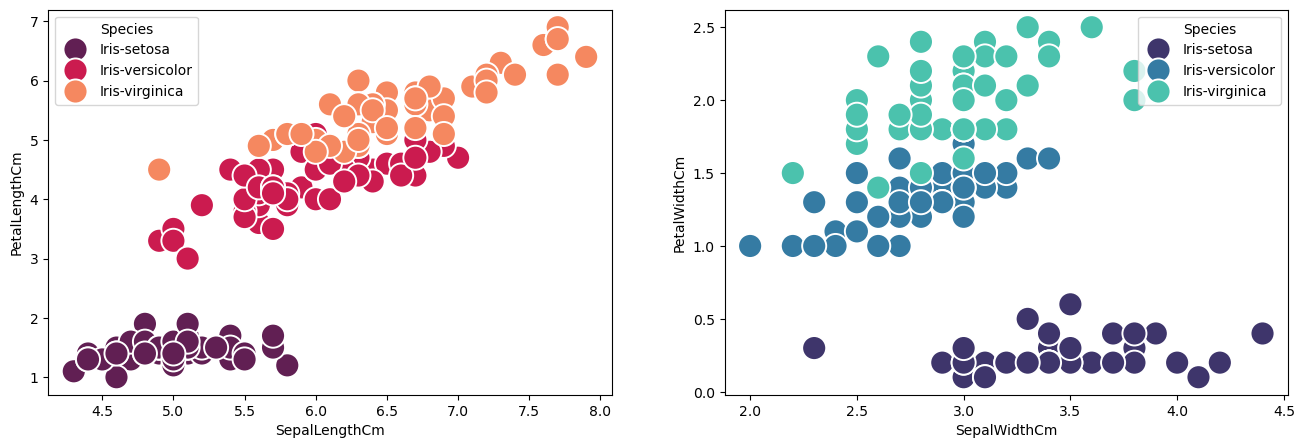

In [28]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=data,hue='Species',ax=ax1,s=300,marker='o', palette = 'rocket')
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=data,hue='Species',ax=ax2,s=300,marker='o', palette = 'mako')

### Pie plot to show the overall types of Iris classifications

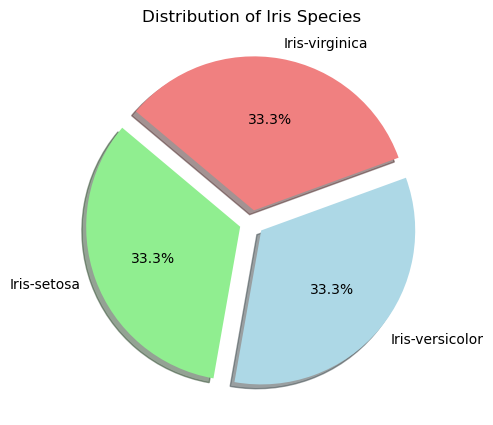

In [30]:
colors = ['lightgreen', 'lightblue', 'lightcoral']
plt.figure(figsize=(5, 5))
data['Species'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.08, 0.08, 0.08], startangle=140)
plt.title('Distribution of Iris Species')
plt.ylabel('')  
plt.show()


### Shuffling data

In [32]:
data = data.sample(frac = 1)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
65,66,6.7,3.1,4.4,1.4,Iris-versicolor
137,138,6.4,3.1,5.5,1.8,Iris-virginica
120,121,6.9,3.2,5.7,2.3,Iris-virginica
127,128,6.1,3.0,4.9,1.8,Iris-virginica
136,137,6.3,3.4,5.6,2.4,Iris-virginica
...,...,...,...,...,...,...
64,65,5.6,2.9,3.6,1.3,Iris-versicolor
4,5,5.0,3.6,1.4,0.2,Iris-setosa
106,107,4.9,2.5,4.5,1.7,Iris-virginica
18,19,5.7,3.8,1.7,0.3,Iris-setosa


## Label Encoding


In [34]:
label_encoder = preprocessing.LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
65,66,6.7,3.1,4.4,1.4,1
137,138,6.4,3.1,5.5,1.8,2
120,121,6.9,3.2,5.7,2.3,2
127,128,6.1,3.0,4.9,1.8,2
136,137,6.3,3.4,5.6,2.4,2
...,...,...,...,...,...,...
64,65,5.6,2.9,3.6,1.3,1
4,5,5.0,3.6,1.4,0.2,0
106,107,4.9,2.5,4.5,1.7,2
18,19,5.7,3.8,1.7,0.3,0


## Prepare the data

### Splitting the dataset


In [37]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model

In [39]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

### Define the sample with the same feature names

In [41]:
sample = pd.DataFrame([[7.3, 2.8, 6.3, 1.8]], columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

### Make the prediction

In [43]:
prediction = DTC.predict(sample)

### Output of the prediction

In [45]:
print("The prediction is:", prediction[0])

The prediction is: 2


## Visualize the decision tree

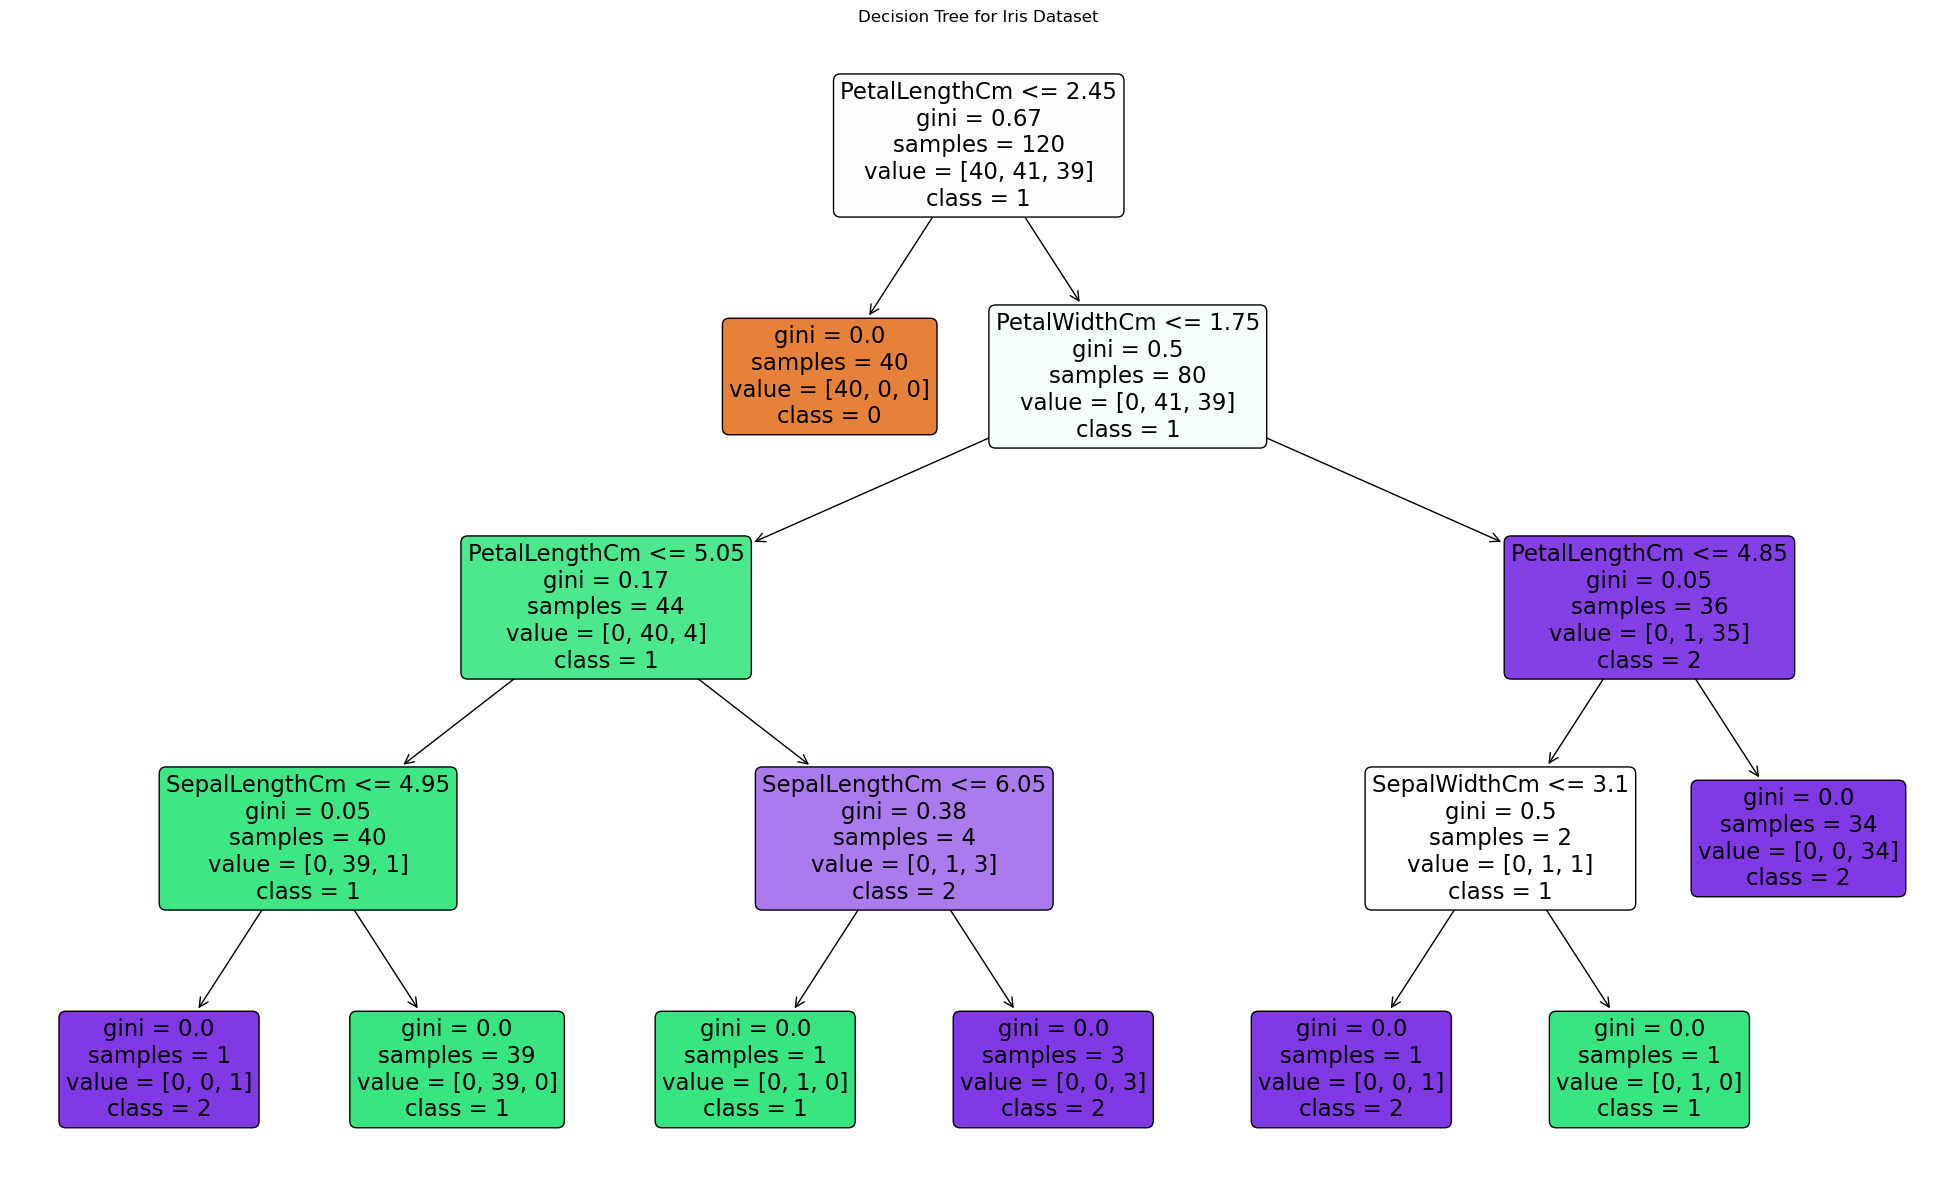

In [47]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,15))
plot_tree(DTC, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in DTC.classes_], rounded=True, precision=2)
plt.title("Decision Tree for Iris Dataset")
plt.show()